<a href="https://colab.research.google.com/github/preethamak/MakeMore/blob/main/MakeMore2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2025-07-07 13:38:44--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.04s   

2025-07-07 13:38:44 (6.14 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)
print(stoi)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)   #the input, 3 values [32 , 3] : 32 --> example of 3 names taken, and 3 is the block size taken
Y = torch.tensor(Y)  #the output of the prediction, 1 value [32] --> the prediction of each example, output [32] single charcters.

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
Y.shape

torch.Size([32])

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
C = torch.randn((27, 2))    #creating variable c and 27, 2 dimension and setting random values

In [ ]:
C

tensor([[ 0.7997,  0.7065],
        [ 0.2049,  0.5940],
        [-0.4355,  0.1808],
        [-1.3589, -1.2608],
        [-1.1131,  1.2654],
        [ 0.4790, -0.6228],
        [ 0.2854,  1.6310],
        [-0.1247,  0.7839],
        [-0.6762,  0.5859],
        [-1.8682,  0.6811],
        [ 1.1464, -1.7319],
        [-0.2409,  0.7823],
        [-1.2781, -0.3793],
        [ 1.3092,  0.2014],
        [-1.4968, -1.4500],
        [ 0.7333,  1.4490],
        [ 0.0564,  1.3567],
        [ 0.3113, -1.2363],
        [ 0.9502,  1.5242],
        [-0.0024,  2.1608],
        [-0.1771,  0.4765],
        [ 0.7351, -1.4462],
        [ 1.5138, -0.1530],
        [ 0.4980,  0.2558],
        [ 0.4334,  0.8630],
        [-1.1991,  1.1550],
        [-1.1128,  0.2120]])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.4790, -0.6228])

In [ ]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [ ]:
C[5]

tensor([ 0.4790, -0.6228])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))          #setting layer 1 neural network, 100 neuron
b1 = torch.randn(100)               #baising each of them

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)       # is the input*weights + bias   [32, 6]@[6, 100] + [1, 100]

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
h

tensor([[-0.9288, -0.6677, -0.7760,  ..., -0.4524,  0.6180, -0.7160],
        [ 0.2384, -0.8320, -0.9890,  ...,  0.3297, -0.4533, -0.9500],
        [ 0.8995, -0.0136,  0.3716,  ..., -0.7071, -0.5494, -0.3308],
        ...,
        [-0.9998, -0.9987, -0.9998,  ...,  0.7905,  0.9384, -0.9694],
        [-0.9999, -0.9991, -0.9997,  ...,  0.9894,  0.9916, -0.5556],
        [-0.9946, -0.9996, -0.6625,  ..., -0.5696,  0.9992,  0.8527]])

In [ ]:
X[13,2]

tensor(1)

In [ ]:
C[X][13,2]

tensor([0.2049, 0.5940])

In [ ]:
C[1]

tensor([0.2049, 0.5940])

In [ ]:
emb.view(32, 6)

tensor([[ 0.7997,  0.7065,  0.7997,  0.7065,  0.7997,  0.7065],
        [ 0.7997,  0.7065,  0.7997,  0.7065,  0.4790, -0.6228],
        [ 0.7997,  0.7065,  0.4790, -0.6228,  1.3092,  0.2014],
        [ 0.4790, -0.6228,  1.3092,  0.2014,  1.3092,  0.2014],
        [ 1.3092,  0.2014,  1.3092,  0.2014,  0.2049,  0.5940],
        [ 0.7997,  0.7065,  0.7997,  0.7065,  0.7997,  0.7065],
        [ 0.7997,  0.7065,  0.7997,  0.7065,  0.7333,  1.4490],
        [ 0.7997,  0.7065,  0.7333,  1.4490, -1.2781, -0.3793],
        [ 0.7333,  1.4490, -1.2781, -0.3793, -1.8682,  0.6811],
        [-1.2781, -0.3793, -1.8682,  0.6811,  1.5138, -0.1530],
        [-1.8682,  0.6811,  1.5138, -0.1530, -1.8682,  0.6811],
        [ 1.5138, -0.1530, -1.8682,  0.6811,  0.2049,  0.5940],
        [ 0.7997,  0.7065,  0.7997,  0.7065,  0.7997,  0.7065],
        [ 0.7997,  0.7065,  0.7997,  0.7065,  0.2049,  0.5940],
        [ 0.7997,  0.7065,  0.2049,  0.5940,  1.5138, -0.1530],
        [ 0.2049,  0.5940,  1.5138, -0.1

In [ ]:
W2 = torch.randn(100, 27)          #setting the 2nd layer neural network, taking 100 input from 1st layer and should give output b/w 27 charcters.
b2 = torch.randn(27)               #there are 27 neural network, so setting bais for them.. weights and bais are set randomly using torch.randn() function

In [ ]:
logits = h @ W2 + b2                 # h is the x[i]*w[i]+b of layer 1. [32, 100] @ [100, 27] + [1, 27] = [32, 27]

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
logits

tensor([[ 6.1397e+00,  1.2644e+01, -7.9557e+00,  1.6835e+01, -3.6799e-02,
          8.4989e+00, -1.4966e+01, -5.9538e+00,  5.7842e+00,  2.4552e-01,
          5.4817e+00, -1.1043e+01,  9.5827e+00,  1.6604e+01,  7.2460e+00,
          8.3849e+00, -8.5896e+00, -1.1430e+01, -3.5162e+00,  1.4741e+01,
         -1.9019e+00,  1.3202e-01,  1.3487e+01, -5.1241e+00,  1.3946e+00,
         -3.1337e+00,  2.0675e+01],
        [ 9.2522e+00,  1.5629e+00, -9.3440e+00,  1.9092e+00, -2.0568e-01,
          9.4458e+00, -1.8840e+01,  7.5385e+00,  4.8219e+00, -1.9839e+00,
          9.1636e+00, -1.1668e+01, -1.8993e+00,  8.1849e+00,  2.0088e+00,
          9.6135e+00,  5.7441e+00, -1.1077e+01,  2.6433e+00,  9.5886e+00,
          2.9152e+00, -1.5790e+00,  1.2563e+01, -3.7349e+00,  9.4234e+00,
         -4.2989e+00,  1.2117e+01],
        [ 5.4752e+00,  1.4602e+01, -3.5980e+00,  1.2414e+01, -1.7542e+00,
          1.2197e+01, -8.6528e+00, -7.3573e+00,  4.3297e-01, -2.1065e+00,
          6.0907e+00, -1.0611e+01,  2.46

In [ ]:
counts = logits.exp()          #set variable count that is the exponential value of logits, as logits contains negative value also

In [ ]:
counts

tensor([[4.6391e+02, 3.0993e+05, 3.5067e-04, 2.0480e+07, 9.6387e-01, 4.9094e+03,
         3.1639e-07, 2.5961e-03, 3.2512e+02, 1.2783e+00, 2.4025e+02, 1.5993e-05,
         1.4511e+04, 1.6250e+07, 1.4025e+03, 4.3804e+03, 1.8602e-04, 1.0867e-05,
         2.9713e-02, 2.5237e+06, 1.4929e-01, 1.1411e+00, 7.1966e+05, 5.9514e-03,
         4.0333e+00, 4.3557e-02, 9.5251e+08],
        [1.0428e+04, 4.7728e+00, 8.7488e-05, 6.7474e+00, 8.1410e-01, 1.2655e+04,
         6.5757e-09, 1.8790e+03, 1.2420e+02, 1.3753e-01, 9.5436e+03, 8.5621e-06,
         1.4968e-01, 3.5862e+03, 7.4540e+00, 1.4965e+04, 3.1233e+02, 1.5465e-05,
         1.4059e+01, 1.4597e+04, 1.8453e+01, 2.0618e-01, 2.8566e+05, 2.3876e-02,
         1.2375e+04, 1.3583e-02, 1.8289e+05],
        [2.3871e+02, 2.1947e+06, 2.7379e-02, 2.4613e+05, 1.7305e-01, 1.9817e+05,
         1.7464e-04, 6.3790e-04, 1.5418e+00, 1.2166e-01, 4.4175e+02, 2.4645e-05,
         1.1748e+01, 1.7306e+02, 2.1527e-02, 3.1818e+02, 1.5113e-02, 6.6316e-07,
         1.0819e-

In [ ]:
prob = counts / counts.sum(1, keepdim= True)                    #normalise the counts as they have value above 1 by exponential graph

In [ ]:
counts.shape                        #shape of count is h @ W2 = [32, 100] @ [100, 27] = [32, 27]

torch.Size([32, 27])

In [ ]:
prob.shape                  #the shape of probabilty distrubution is h@W2 = [32, 100]@[100, 27] = [32, 27]

torch.Size([32, 27])

In [ ]:
prob[0].sum()          #every row sums to 1, as the values are normalized

tensor(1.0000)

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
l = prob[torch.arange(32), Y]     #values are distrubuted randomly, which results in high loss
l

tensor([4.9449e-06, 6.5315e-03, 1.8921e-06, 1.2517e-03, 1.1383e-02, 4.4121e-06,
        1.0893e-05, 2.7497e-12, 3.3860e-10, 3.7416e-07, 2.0088e-09, 9.9379e-10,
        3.1217e-04, 5.6732e-04, 2.5613e-04, 4.9630e-06, 1.2875e-09, 2.5082e-06,
        3.5509e-02, 3.8760e-08, 9.2687e-13, 1.2262e-07, 9.1952e-15, 3.3481e-11,
        4.0103e-11, 2.5419e-03, 1.2492e-08, 2.1058e-14, 2.9945e-13, 2.7031e-10,
        9.3713e-10, 7.8295e-09])

In [ ]:
loss = -l.log().mean()
loss                       #the loss function is 18, which shows that model is very badly predicting.

tensor(16.5347)

In [ ]:
## the F.cross_entropy() is used to save memory, not to create the intermidiate values(eg: logits, counts etc..)
## torch librabry directly provides the probabilty. so it saves space and memory.
# if we use exp function, and we have logits value which is very positive then the output probability distrubution goes to infinity.
# also F.cross_entropy() is much more efficent in forward and backward pass

In [ ]:
#optimization version>>

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.1367247104644775


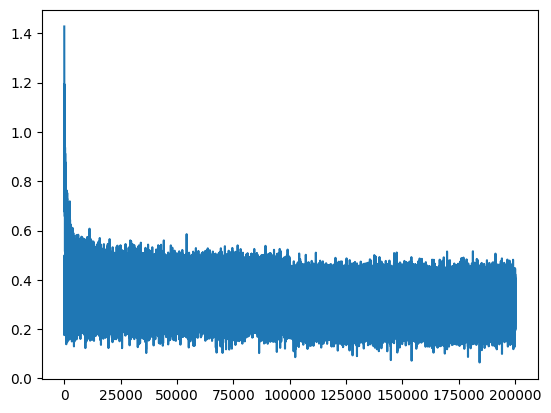

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)                  #training set
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0443, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)            #developed test
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1207, grad_fn=<NllLossBackward0>)

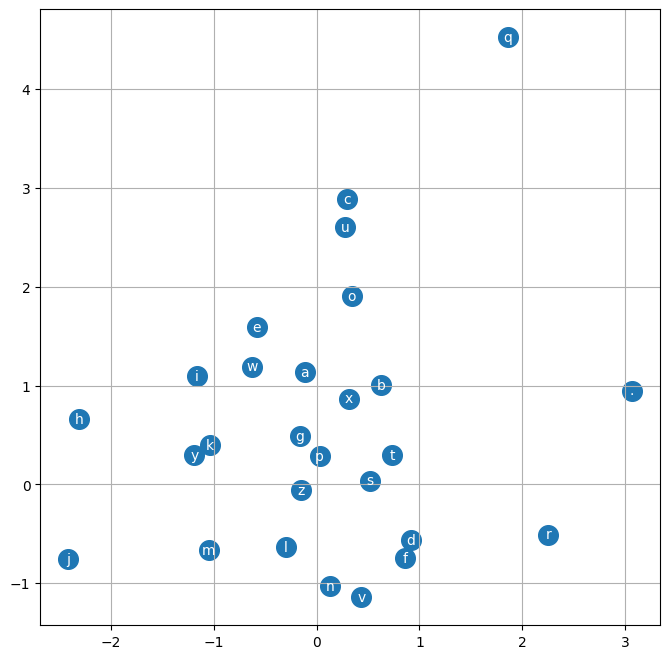

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

montaymyah.
seen.
ndhriah.
reisha.
endraeg.
adee.
daelin.
shi.
jen.
eden.
van.
aar.
elle.
malka.
cayshabergiad.
jest.
jair.
jeniquetzaley.
brence.
ryyah.
